In [168]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import OrderedDict

In [681]:
df = pd.read_excel(r'C:\Users\15tim\Downloads\ecoworld72.xls')

In [682]:
df

group_id  post_id                                               text  \
0  -134467808      365  Ищем Менеджера по закупкам З/П от 30000 до 45 ...   
1  -134467808      363                                                NaN   
2  -134467808      362                           Берегите бумагу, друзья!   
3  -134467808      361  По традиции, соц сети чаще всего бурлят ненави...   
4  -134467808      359  🤯🤯🤯Задумайся сколько Мусора мы производим в не...   
5  -134467808      358                                                NaN   
6  -134467808      356                                                NaN   
7  -134467808      354  Добрый день,  друзья!\n⠀\nМы ведем исключитель...   
8  -134467808      353                                                NaN   
9  -134467808      351  Скоро Новый Год!!!🎄 \nДо праздника осталось со...   
10 -134467808      350  Поздравляем победителя конкурса! [id458054026|...   
11 -134467808      349  Приём архивов – цена отличная, конфиденциально...   
12 -134467808      347  🏝👏 <1>70 летняя бабушка очистила 52 пляжа</1>!...   
13 -134467808      343  <1>Есть макулатура или пластик? \nСДАЙСЯ!</1>\...   
14 -134467808      341                                                NaN   
15 -134467808      340  📢<1>ПОРА ЧИСТИТЬ АРХИВ!!!\nНаступает конец год...   
16 -134467808      338                                                NaN   
17 -134467808      335  Друзья! 🎁Напоминаем вам, что вы можете принять...   
18 -134467808      334                                                NaN   
19 -134467808      331                                                NaN   
20 -134467808      328                Голосуем за команду номер 9 Друзья!   
21 -134467808      327  Группа [club55072656|LITTLE BIG] сняли клип на...   
22 -134467808      326                                                NaN   
23 -134467808      324  Разыгрываем ПОДАРОЧНЫЙ СЕРТИФИКАТ на обучение ...   
24 -134467808      323                                                NaN   
25 -134467808      322  <1>МОБИЛЬНЫЙ ПУНКТ ПРИЁМА🚚\nЕсли у вас накопил...   
26 -134467808      321                       <1>Вы сдаете макулатуру?</1>   

   post_type  count_comments  count_likes  count_reposts  count_views  
0       post               0            0              0          126  
1       post               1            6              0          483  
2       post               0            3              0          541  
3       post               0            6              2          552  
4       post               0            4              2          631  
5       post               0            2              0          379  
6       post               1            5              0          422  
7       post               0            4              2          334  
8       post               0            7              2          462  
9       post               0            2              0          249  
10      post               0            3              1          390  
11      post               0            3              1          317  
12      post               0            5              1          251  
13      post               0            4              0          242  
14      post               0            3              0          214  
15      post               0            6              1         1788  
16      post               0            2              0          180  
17      post               0            3              1          308  
18      post               0            4              1          287  
19      post               0            1              1          272  
20      post               0            2              0          167  
21      post               0            3              1          289  
22      post               0            4              0          172  
23      post               0           78             32        15393  
24      post               0            3       

In [683]:
df = df.dropna()
df = df.drop_duplicates(subset=['text'])
df

group_id  post_id                                               text  \
0  -134467808      365  Ищем Менеджера по закупкам З/П от 30000 до 45 ...   
2  -134467808      362                           Берегите бумагу, друзья!   
3  -134467808      361  По традиции, соц сети чаще всего бурлят ненави...   
4  -134467808      359  🤯🤯🤯Задумайся сколько Мусора мы производим в не...   
7  -134467808      354  Добрый день,  друзья!\n⠀\nМы ведем исключитель...   
9  -134467808      351  Скоро Новый Год!!!🎄 \nДо праздника осталось со...   
10 -134467808      350  Поздравляем победителя конкурса! [id458054026|...   
11 -134467808      349  Приём архивов – цена отличная, конфиденциально...   
12 -134467808      347  🏝👏 <1>70 летняя бабушка очистила 52 пляжа</1>!...   
13 -134467808      343  <1>Есть макулатура или пластик? \nСДАЙСЯ!</1>\...   
15 -134467808      340  📢<1>ПОРА ЧИСТИТЬ АРХИВ!!!\nНаступает конец год...   
17 -134467808      335  Друзья! 🎁Напоминаем вам, что вы можете принять...   
20 -134467808      328                Голосуем за команду номер 9 Друзья!   
21 -134467808      327  Группа [club55072656|LITTLE BIG] сняли клип на...   
23 -134467808      324  Разыгрываем ПОДАРОЧНЫЙ СЕРТИФИКАТ на обучение ...   
25 -134467808      322  <1>МОБИЛЬНЫЙ ПУНКТ ПРИЁМА🚚\nЕсли у вас накопил...   
26 -134467808      321                       <1>Вы сдаете макулатуру?</1>   

   post_type  count_comments  count_likes  count_reposts  count_views  
0       post               0            0              0          126  
2       post               0            3              0          541  
3       post               0            6              2          552  
4       post               0            4              2          631  
7       post               0            4              2          334  
9       post               0            2              0          249  
10      post               0            3              1          390  
11      post               0            3              1          317  
12      post               0            5              1          251  
13      post               0            4              0          242  
15      post               0            6              1         1788  
17      post               0            3              1          308  
20      post               0            2              0          167  
21      post               0            3              1          289  
23      post               0           78             32        15393  
25      post               0            7              1          288  
26      post               0            9              2          427

In [173]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

import nltk, re
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('russian')

def clean_text(text):
    text = text.replace("\\", " ").replace(u"╚", " ").replace(u"╩", " ").replace("«", '').replace("»", '').replace("…", '')
    text = text.lower()
    text = re.sub('\-\s\r\n\s{1,}|\-\s\r\n|\r\n', '', text) 
    text = re.sub('[.,<>|:;_%©?*,!@#$%“”^&♻()\d]|[+=]|[[]|[]]|[/]|"|\s{2,}|-', ' ', text)
    # можно просто проверить, является ли символ пробелом или буквой (isalpha())
    text = " ".join(morph.parse(word)[0].normal_form for word in text.split())
    new_text = []
    for word in text.split():
      if word not in stoplist:
        new_text.append(word)
    text = " ".join(new_text)
    return text

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=aa599f53ca49fa58920668cbb366b12bfb58e5589a5408f096ba71b9cca64d56
  Stored in directory: c:\users\15tim\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15tim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [671]:
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0

In [198]:
dict1 = {}
dict2 = {}
dict3 = {}
dict4 = {}
dict5 = {}
dict6 = {}
dict7 = {}
dict8 = {}
dict9 = {}

In [684]:
for z in df['text']:
    if '</' in z:
        while r'</' in z:
            x = z
            idxx = x.find(r'</')
            idx = x[x.find('<') + 1]
            lst = x[x.find('<')+3:x.find(r'</')]
            lst = clean_text(lst).split()
            if idx == '1':
                for i in lst:
                    if i in dict1:
                        dict1[i] += 1
                    else:
                        dict1[i] = 1
            elif idx == '2':
                for i in lst:
                    if i in dict2:
                        dict2[i] += 1
                    else:
                        dict2[i] = 1
            elif idx == '3':
                for i in lst:
                    if i in dict3:
                        dict3[i] += 1
                    else:
                        dict3[i] = 1      
            elif idx == '4':
                for i in lst:
                    if i in dict4:
                        dict4[i] += 1
                    else:
                        dict4[i] = 1
            elif idx == '5':
                for i in lst:
                    if i in dict5:
                        dict5[i] += 1
                    else:
                        dict5[i] = 1
            elif idx == '6': 
                for i in lst:
                    if i in dict6:
                        dict6[i] += 1
                    else:
                        dict6[i] = 1
            elif idx == '7':
                for i in lst:
                    if i in dict7:
                        dict7[i] += 1
                    else:
                        dict7[i] = 1 
            elif idx == '8':
                for i in lst:
                    if i in dict8:
                        dict8[i] += 1
                    else:
                        dict8[i] = 1 
            elif idx == '9':
                for i in lst:
                    if i in dict9:
                        dict9[i] += 1
                    else:
                        dict9[i] = 1              
            z = z[idxx+4:]


In [197]:
def sortdict(dictin):
    value_key_pairs = ((value, key) for (key,value) in dictin.items())
    sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
    return {k: v for v, k in sorted_value_key_pairs}

In [557]:
dict11 = sortdict(dict11)
dict11

{'раздельн': 87,
 'сво': 50,
 'акц': 50,
 'эт': 38,
 'тюмен': 33,
 'жизн': 33,
 'вторсыр': 30,
 'нов': 27,
 'моч': 26,
 'помоч': 25,
 'котор': 24,
 'объединен': 23,
 'ден': 23,
 'рассказа': 22,
 'хотет': 21,
 'приход': 21,
 'добровольческ': 20,
 'ве': 20,
 'лекц': 19,
 'переработк': 18,
 'зелен': 18,
 'помощ': 17,
 'групп': 17,
 'помога': 16,
 'врем': 16,
 'развит': 15,
 'объявлен': 15,
 'работ': 14,
 'записыва': 14,
 'дежурн': 14,
 'узна': 13,
 'кажд': 13,
 'участ': 12,
 'сдела': 12,
 'провест': 12,
 'пожалуйст': 12,
 'планет': 12,
 'организова': 12,
 'нача': 12,
 'иска': 12,
 'вещ': 12,
 'присоедин': 11,
 'природ': 11,
 'посвят': 11,
 'очен': 11,
 'иде': 11,
 'все': 11,
 'тем': 10,
 'распространен': 10,
 'провод': 10,
 'мест': 10,
 'материа': 10,
 'информац': 10,
 'знат': 10,
 'жит': 10,
 'упаковк': 9,
 'сыр': 9,
 'суббот': 9,
 'сред': 9,
 'сдат': 9,
 'росс': 9,
 'приемщик': 9,
 'одноразов': 9,
 'нужн': 9,
 'встреч': 9,
 'точк': 8,
 'такж': 8,
 'родительств': 8,
 'ребенок': 8,
 'расп

In [660]:
c4

0

OrderedDict([('!НЕ', 1),
             ('"Mr.', 1),
             ('"АВТОПРОО"', 1),
             ('"ГРАНУЛА"', 3),
             ('"Гранула"', 7),
             ('"Гранула".', 3),
             ('"Гранулы"', 1),
             ('"Дзержинец"', 1),
             ('"Жуков"', 1),
             ('"ЗЕЛЕНОЕ"', 1),
             ('"Зеленого', 1),
             ('"Зеленый', 1),
             ('"Зеленых', 1),
             ('"КРУГ', 1),
             ('"КРУГОВОРОТ', 2),
             ('"Круговорот"', 3),
             ('"Круговорот".', 2),
             ('"Круговорота"', 2),
             ('"Куда', 2),
             ('"Либерта"', 1),
             ('"Либерта",', 1),
             ('"НОВ-Экология"', 1),
             ('"НОВЭК"', 3),
             ('"Неделе', 1),
             ('"Новэк"', 3),
             ('"Ноль', 1),
             ('"Раздельный', 1),
             ('"Райт"', 1),
             ('"Синдикат', 3),
             ('"Сортировочной"', 1),
             ('"Стационарные', 1),
             ('"Строительный', 1),
     

In [295]:
ax = []
labels = []
for label,axis in dict9.items():
    ax.append(axis)
    labels.append(label)

In [290]:
fig1, ax1 = plt.subplots()
ax1.pie(ax, labels=labels)
plt.show()

In [293]:
from wordcloud import WordCloud


In [292]:
!pip install wordcloud

In [300]:
text = ' '.join(labels)
# Генерируем облако слов и сохраняем в переменной cloud
cloud = WordCloud().generate(text)
# Выводим облако слов на экран
plt.imshow(cloud)
# Отключаем отображение осей
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

In [510]:
alph = '#qazxswedcvfrtgbnhyujmkiolp–№❄✅—😉💪📚🌲🌍—📅✨⛔📌😜🚐👥✨💡😃👍🥛🤫🛍💧👇🏻🍍🍀🌿🌼🌳🌳🌱⚡'
for key in dict1.copy():
    for i in key:
        if i in alph:
            dict1.pop(key)

In [613]:
text

'наш жизнь техника субботник свалка ремонт мастер это экологичный экологический чистый чинить хороший фото фест ухаживать тюмень терпеливо стих спасти соцсеть соостояние сойер сломать свободный свежий роман реставрационный прохудиться проект продвигать присоединяться присоединиться приносить предоставить предмет поселиться позировать подлежать подарить перенести п отдельный отдать одежда обувь образ ненужный наряжаться наполнять мочь мелкий мастерить магазин любовный лес лаффка кукольник куколка костюм книжка книга классика карнавал инсталляция здорово запчасть запрос заниматься желать друг деревянный день дело дашков давать выйти вторсырьё второй всё время восстанавливать возвращать вещь бытовой большой благотворительный баннер акция'

In [548]:
dict23 = {'маркирует': 45,
          'маркировать': 67}
dict13 = dict23.copy()
for key in dict13.copy():
    new_key = snowball.stem(key)
    dict13[new_key] = dict13[key]
    del dict13[key]
dict13

{'маркир': 45, 'маркирова': 67}

In [535]:
with open("practice_11.txt", 'w', encoding="utf-8") as f: 
    for key, value in dict11.items(): 
        f.write('%s:%s\n' % (key, value))

In [523]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")

In [575]:
dict11 = dict8.copy()
for key in dict11.copy():
    new_key = morph.parse(key)[0].normal_form
    if new_key!=key:
        dict11[new_key] = dict11[key]
        del dict11[key]
len(dict8)

1586

In [555]:
dict8

{'сбор': 109,
 'раздельный': 87,
 'отход': 76,
 'экологический': 57,
 'волонтёр': 55,
 'свой': 50,
 'акция': 50,
 'наш': 45,
 'круговорот': 42,
 'это': 38,
 'экологичный': 36,
 'нужный': 35,
 'друг': 34,
 'тюмень': 33,
 'жизнь': 33,
 'вторсырьё': 30,
 'новый': 27,
 'мочь': 26,
 'помочь': 25,
 'человек': 24,
 'проект': 24,
 'который': 24,
 'объединение': 23,
 'день': 23,
 'рассказать': 22,
 'хотеть': 21,
 'приходить': 21,
 'добровольческий': 20,
 'дело': 20,
 'весь': 20,
 'ваш': 20,
 'лекция': 19,
 'большой': 19,
 'сосед': 18,
 'переработка': 18,
 'зелёный': 18,
 'состояться': 17,
 'помощь': 17,
 'группа': 17,
 'помогать': 16,
 'готовый': 16,
 'время': 16,
 'экоурок': 15,
 'развитие': 15,
 'объявление': 15,
 'дом': 15,
 'стать': 14,
 'работа': 14,
 'образ': 14,
 'записываться': 14,
 'дежурный': 14,
 'узнать': 13,
 'сдавать': 13,
 'пункт': 13,
 'открытый': 13,
 'каждый': 13,
 'вопрос': 13,
 'эко': 12,
 'участие': 12,
 'среда': 12,
 'сделать': 12,
 'провести': 12,
 'пожалуйста': 12,
 'пла

In [558]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


In [663]:
morph.parse('экологический')[0].normal_form

'преэкологический'

In [580]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15tim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [610]:
for keys in dict9.copy():
    if keys in stopwords.words("russian"):
        dict9.pop(keys)

In [611]:
len(dict9)

88

In [616]:
! pip install natasha

In [617]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)


In [618]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [619]:
doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
doc.tag_ner(ner_tagger)

In [630]:
doc.segment(segmenter)
doc.tokens[:5]

[DocToken(stop=3, text='наш'),
 DocToken(start=4, stop=9, text='жизнь'),
 DocToken(start=10, stop=17, text='техника'),
 DocToken(start=18, stop=27, text='субботник'),
 DocToken(start=28, stop=34, text='свалка')]

<AxesSubplot:>

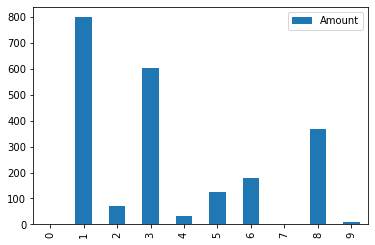

In [719]:
data={'Amount':[0,798,70,601,34,124,177,3,366,9]}
data=pd.DataFrame(data)
data.plot.bar()